In [20]:
import pandas as pd
import numpy as np
from sklearn import metrics

In [21]:
train = np.array(pd.read_csv('train.csv', header=None))
test = np.array(pd.read_csv('test.csv', header=None))
target = np.array(pd.read_csv('trainLabels.csv', header=None))

In [22]:
test.shape

(9000, 40)

In [23]:
from sklearn.preprocessing import StandardScaler
std_sc = StandardScaler()
train = std_sc.fit_transform(train)
train

array([[ 0.27169356, -1.18341196,  1.55577685, ..., -2.73022768,
        -0.88557185, -0.24867748],
       [-1.19051145,  0.35113884,  0.99528688, ...,  1.20983513,
         1.12596669, -1.18723981],
       [ 1.15762218, -0.38378471,  0.09313365, ...,  0.65145411,
        -0.0197001 ,  1.16316129],
       ...,
       [ 0.88030482, -1.68293906, -1.04529613, ...,  0.05482063,
         0.88480255,  0.09989891],
       [ 2.39555118, -0.69993279, -0.89752715, ...,  0.22353944,
        -0.70184189, -1.97203889],
       [ 0.20182867, -0.0599802 ,  0.92034837, ...,  0.3946534 ,
        -1.25599151,  0.86118951]])

In [24]:
from sklearn.model_selection import GridSearchCV

In [25]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(train, target)

C:\Users\SamuelWork\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [26]:
target_pred = gbc.predict(test)

In [27]:
target_pred = target_pred.reshape(-1,1)
target_pred

array([[1],
       [0],
       [0],
       ...,
       [1],
       [0],
       [1]], dtype=int64)

In [30]:
idd = np.arange(1, target_pred.shape[0]+1)
idd

array([   1,    2,    3, ..., 8998, 8999, 9000])

In [31]:
idd = idd.reshape(-1,1)
output = np.c_[idd, target_pred]
output

array([[   1,    1],
       [   2,    0],
       [   3,    0],
       ...,
       [8998,    1],
       [8999,    0],
       [9000,    1]], dtype=int64)

In [32]:
o = pd.DataFrame(output, columns=['ID', 'Solution'])
o

,ID,Solution
0,1,1
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
8995,8996,0
8996,8997,1
8997,8998,1
8998,8999,0


In [33]:
o.to_csv('submission.csv', index=False)

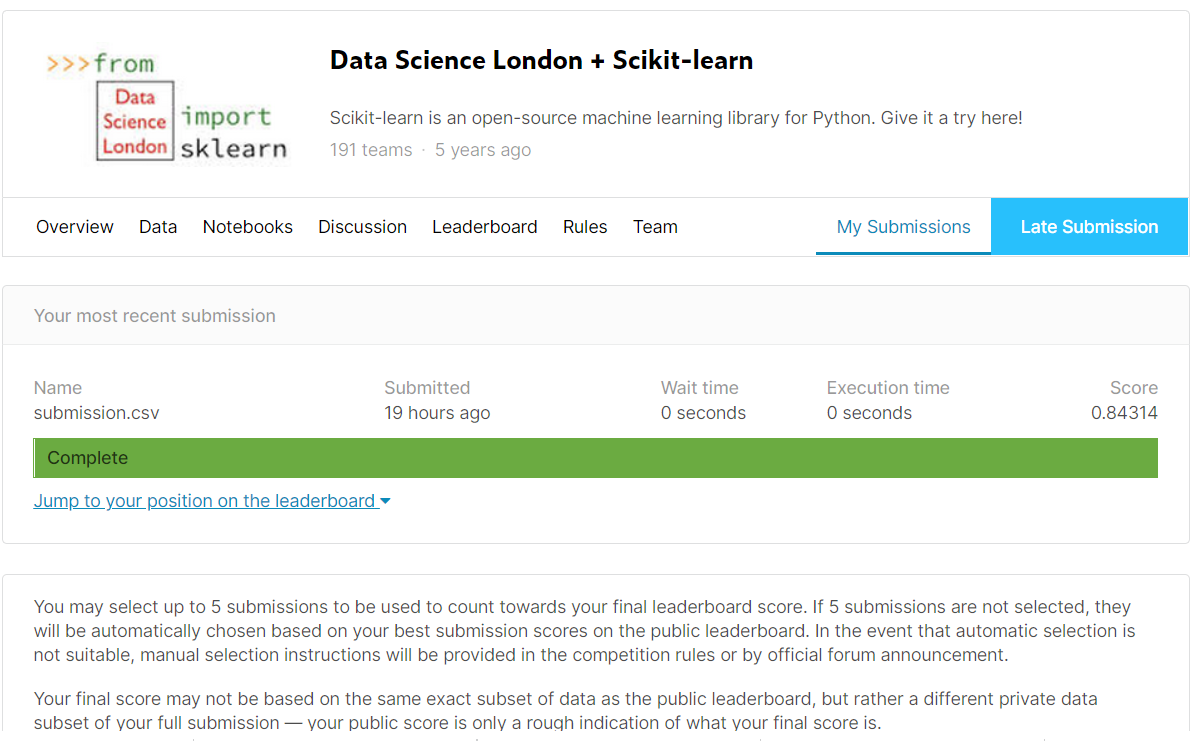